 # GROUP 3 A SSIGNMENT

## CHAPTER 2:  Quesrion 3 

In [1]:
pip install ISLP

Note: you may need to restart the kernel to use updated packages.


### QUESTION 3 A:

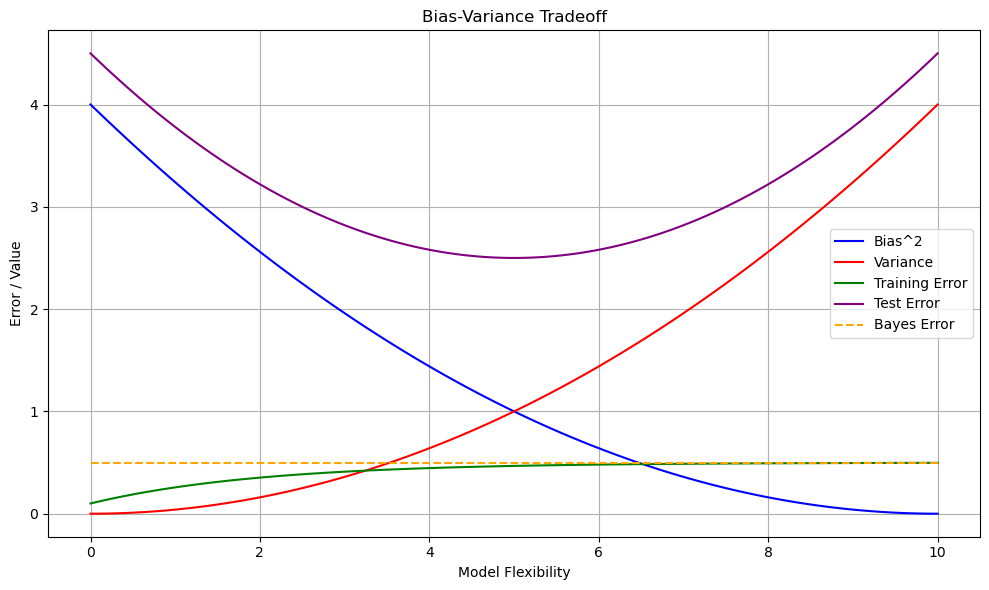

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate flexibility range: from less flexible to more flexible
flexibility = np.linspace(0, 10, 100)

# Create artificial curves to represent each concept
bias_squared = (10 - flexibility)**2 / 25
variance = flexibility**2 / 25
training_error = 0.5 - 0.4 * np.exp(-flexibility / 2)
test_error = bias_squared + variance + 0.5  # Includes Bayes error
bayes_error = np.full_like(flexibility, 0.5)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(flexibility, bias_squared, label='Bias^2', color='blue')
plt.plot(flexibility, variance, label='Variance', color='red')
plt.plot(flexibility, training_error, label='Training Error', color='green')
plt.plot(flexibility, test_error, label='Test Error', color='purple')
plt.plot(flexibility, bayes_error, label='Bayes Error', color='orange', linestyle='--')

plt.xlabel('Model Flexibility')
plt.ylabel('Error / Value')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### QUESTION 3 B:

In [4]:
# CFR IN WORD DOCUMENT

# CHAPTER2 , QUESTION 8

In [5]:
## ✅ (a) Load the data
### assume College.csv

import pandas as pd

# Load the CSV file
college = pd.read_csv('College.csv')

# View the first few rows
college.head()


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,University 1,Yes,4768,3957,954,5,17,2761,40,9876,4992,486,1533,100,100,17.0,31,9737,67
1,University 2,No,4815,3302,1104,22,41,4674,579,7842,4450,286,1425,68,82,9.8,28,10296,51
2,University 3,No,7305,5601,1981,19,43,7648,366,8615,2542,480,848,30,34,16.4,15,7329,64
3,University 4,Yes,4989,3147,1285,12,33,5741,1004,10135,4125,572,1106,88,100,17.7,16,14949,71
4,University 5,Yes,345,260,91,42,65,351,92,19337,6653,486,1393,88,94,20.1,13,19423,62


In [6]:
# ✅ (b) Handle the unnamed index column
# The first column is college names, not real data. We'll fix it with:

# Load data using the first column as index
college2 = pd.read_csv('College.csv', index_col=0)

# OR rename and re-index explicitly
college3 = college.rename({'Unnamed: 0': 'College'}, axis=1)
college3 = college3.set_index('College')

# Use this cleaned version
college = college3

# Preview
college.head()


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
University 1,Yes,4768,3957,954,5,17,2761,40,9876,4992,486,1533,100,100,17.0,31,9737,67
University 2,No,4815,3302,1104,22,41,4674,579,7842,4450,286,1425,68,82,9.8,28,10296,51
University 3,No,7305,5601,1981,19,43,7648,366,8615,2542,480,848,30,34,16.4,15,7329,64
University 4,Yes,4989,3147,1285,12,33,5741,1004,10135,4125,572,1106,88,100,17.7,16,14949,71
University 5,Yes,345,260,91,42,65,351,92,19337,6653,486,1393,88,94,20.1,13,19423,62


In [7]:
# ✅ (c) Describe the data


college.describe()

### This gives summary statistics (mean, std, min, 25%, 50%, 75%, max) for each numerical variable.

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,2905.482625,2157.346203,771.357786,26.850708,46.357786,2577.866152,464.370656,9468.055341,4034.122265,496.698842,1185.674389,69.731017,78.675676,15.031017,20.289575,11258.660232,67.895753
std,3745.310290,2799.724711,1101.158494,14.685916,17.636381,3746.355190,780.221565,3290.844198,1030.637075,96.502187,295.999340,14.633794,14.500367,5.094282,9.997412,4799.592201,14.973196
min,53.000000,43.000000,15.000000,1.000000,4.000000,43.000000,3.000000,2340.000000,1000.000000,200.000000,500.000000,18.000000,28.000000,2.500000,1.000000,1609.000000,18.000000
25%,881.000000,646.000000,211.000000,16.000000,34.000000,652.000000,83.000000,7174.000000,3330.000000,433.000000,979.000000,60.000000,69.000000,11.400000,13.000000,7564.000000,58.000000
50%,1787.000000,1339.000000,437.000000,25.000000,46.000000,1448.000000,212.000000,9266.000000,4052.000000,495.000000,1182.000000,70.000000,79.000000,15.300000,20.000000,10663.000000,68.000000
75%,3364.000000,2529.000000,890.000000,37.000000,58.000000,2930.000000,512.000000,11623.000000,4777.000000,562.000000,1382.000000,80.000000,90.000000,18.600000,27.000000,14349.000000,77.000000
max,36043.000000,27057.000000,10566.000000,70.000000,98.000000,37861.000000,8430.000000,20229.000000,7544.000000,776.000000,2075.000000,100.000000,100.000000,31.500000,59.000000,30417.000000,116.000000


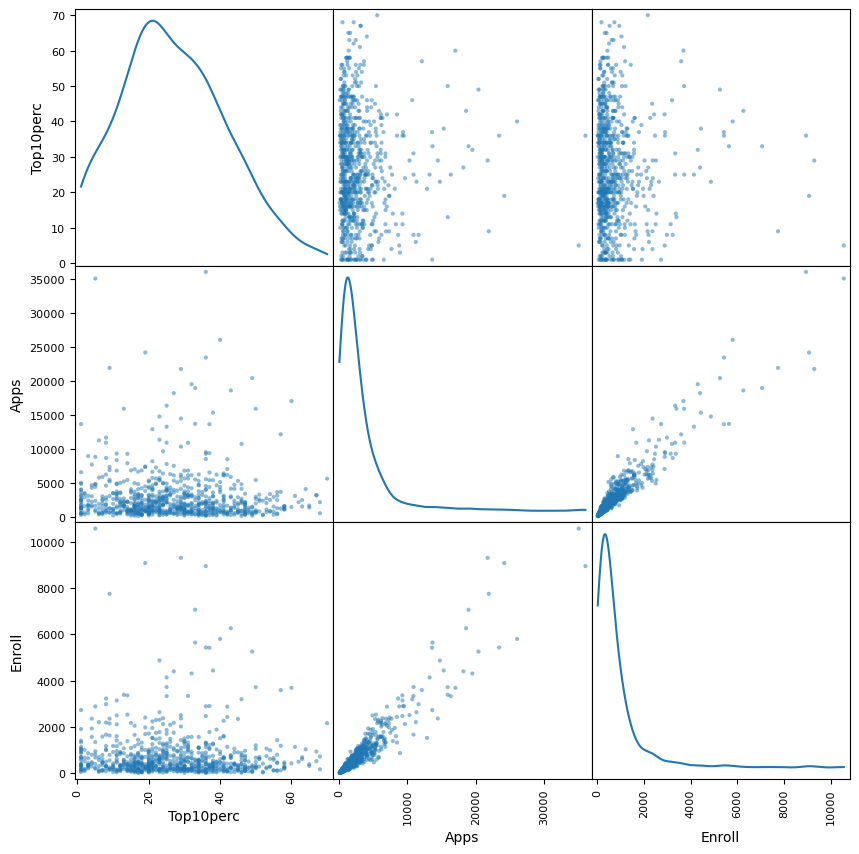

In [8]:
## ✅ (d) Scatterplot matrix for Top10perc, Apps, Enroll
## This helps check for correlations or nonlinear relationships.

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

cols = ['Top10perc', 'Apps', 'Enroll']
scatter_matrix(college[cols], figsize=(10, 10), diagonal='kde')
plt.show()


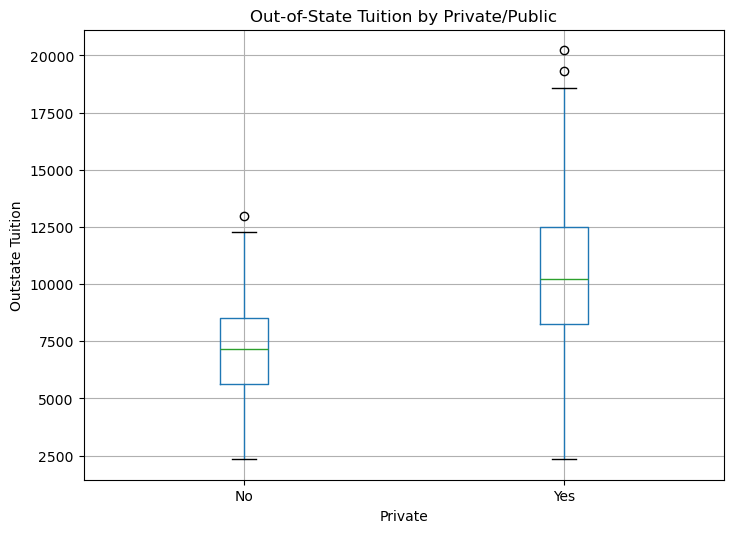

In [9]:
# ✅ (e) Side-by-side boxplots of Outstate vs Private
# Expectation: Private schools generally charge higher out-of-state tuition.

college.boxplot(column='Outstate', by='Private', figsize=(8,6))
plt.title('Out-of-State Tuition by Private/Public')
plt.suptitle('')
plt.xlabel('Private')
plt.ylabel('Outstate Tuition')
plt.show()


In [10]:
# ✅ (f) Create Elite variable from Top10perc and boxplot Outstate vs Elite

In [12]:
# Step 1: Create new variable
# Convert Top10perc to proportions for binning
college['Top10perc'] = college['Top10perc'] / 100

# Create Elite column
college['Elite'] = pd.cut(college['Top10perc'], bins=[0, 0.5, 1], labels=['No', 'Yes'])

# Count values
college['Elite'].value_counts()


Elite
No     729
Yes     48
Name: count, dtype: int64

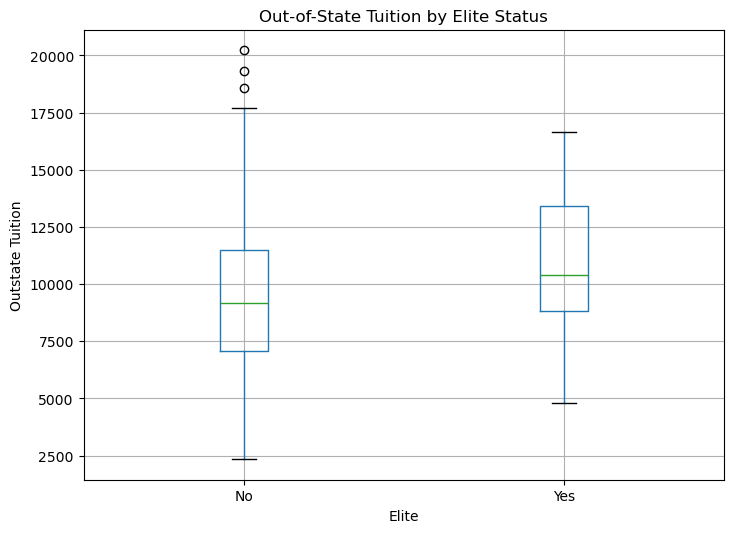

In [13]:
# Step 2: Boxplot
#Expectation: Elite schools charge more tuition.

college.boxplot(column='Outstate', by='Elite', figsize=(8,6))
plt.title('Out-of-State Tuition by Elite Status')
plt.suptitle('')
plt.xlabel('Elite')
plt.ylabel('Outstate Tuition')
plt.show()


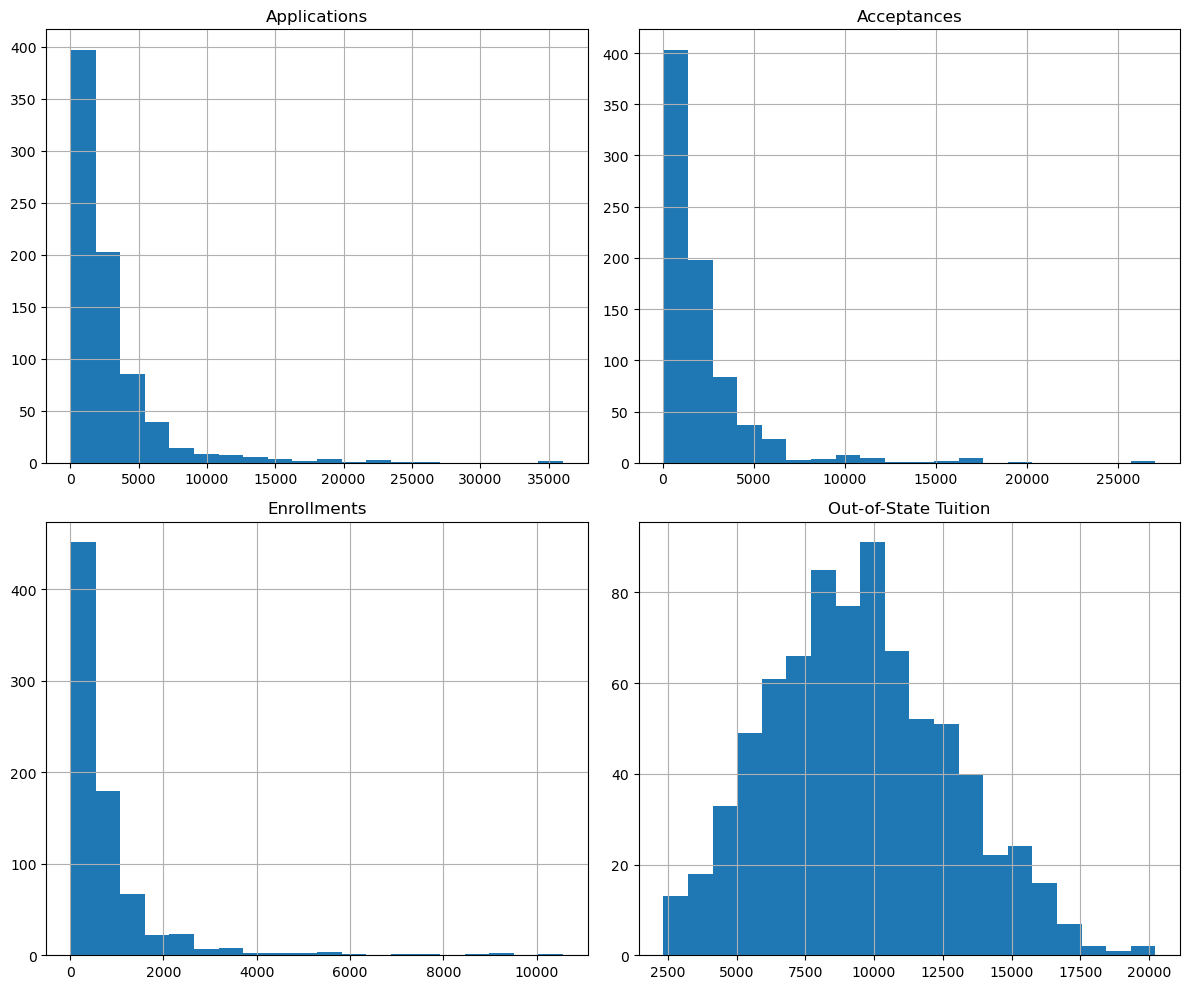

In [14]:
# ✅ (g) Histograms of quantitative variables

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

college['Apps'].hist(bins=20, ax=axes[0,0])
axes[0,0].set_title('Applications')

college['Accept'].hist(bins=20, ax=axes[0,1])
axes[0,1].set_title('Acceptances')

college['Enroll'].hist(bins=20, ax=axes[1,0])
axes[1,0].set_title('Enrollments')

college['Outstate'].hist(bins=20, ax=axes[1,1])
axes[1,1].set_title('Out-of-State Tuition')

plt.tight_layout()
plt.show()


In [16]:
#✅ (h) Summary of Discoveries

#Here’s a sample of what you might observe:

#🔍 Key Findings:
#Private colleges tend to have higher Outstate tuition than public ones.

#Elite colleges (with >50% top 10% students) have higher tuition and selectivity.

#There's a strong correlation between number of applications and enrollments, though it's not strictly linear.

#Enrollments are highly skewed — some colleges enroll far more than others.

#The distribution of Outstate tuition is right-skewed; a few colleges charge extremely high amounts.

#The Elite classification seems to capture a subgroup of well-funded and competitive colleges.


# chapter 3

### Question 3 answered in word

### Question 8

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        06:52:37   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

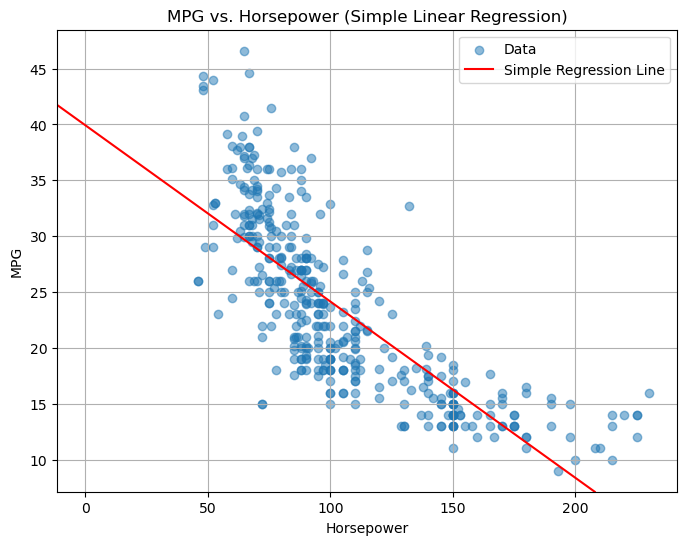

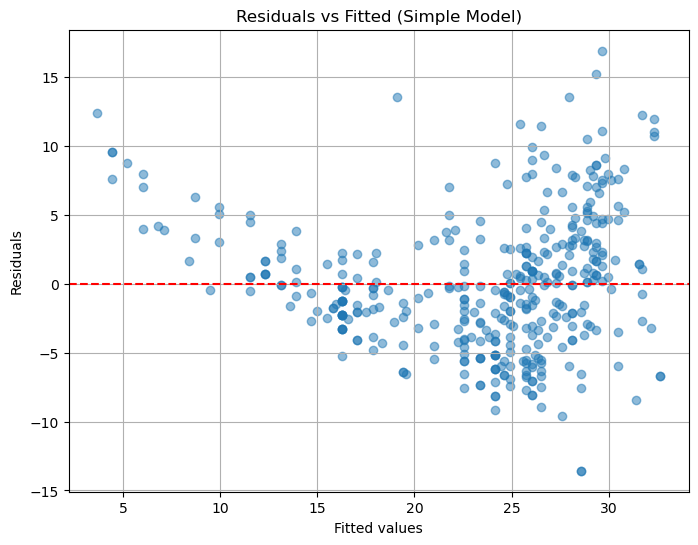

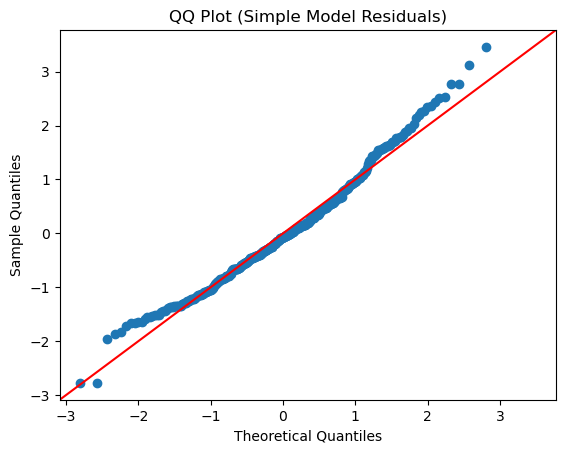

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           5.40e-99
Time:                        06:52:38   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          56.9001      1.800     31.604      

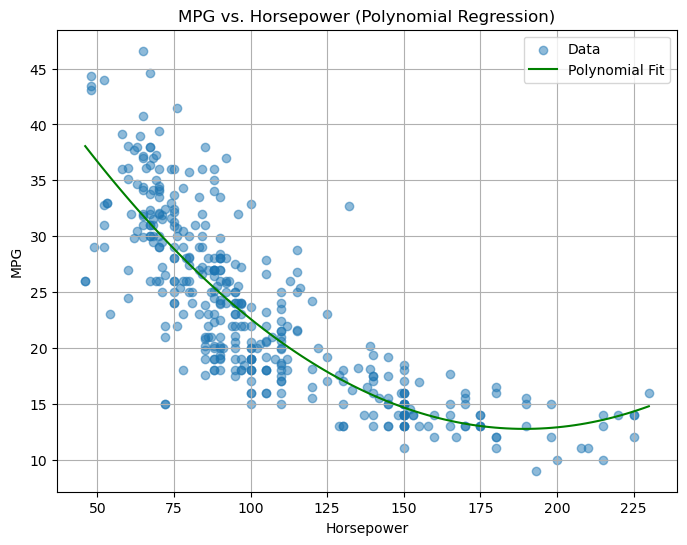

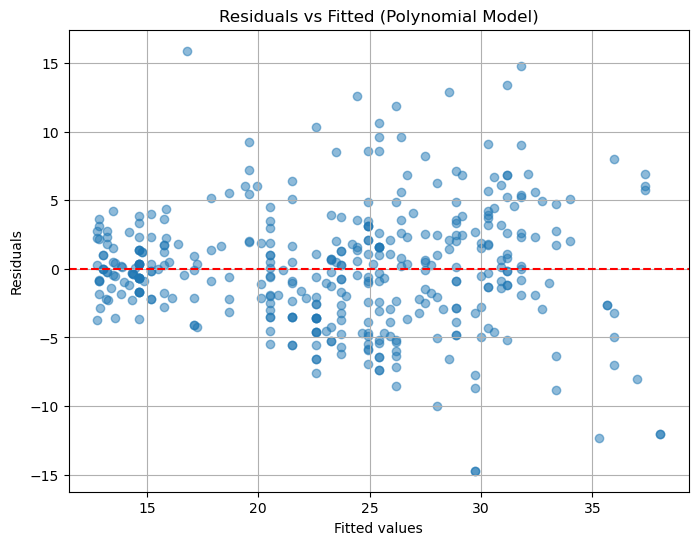

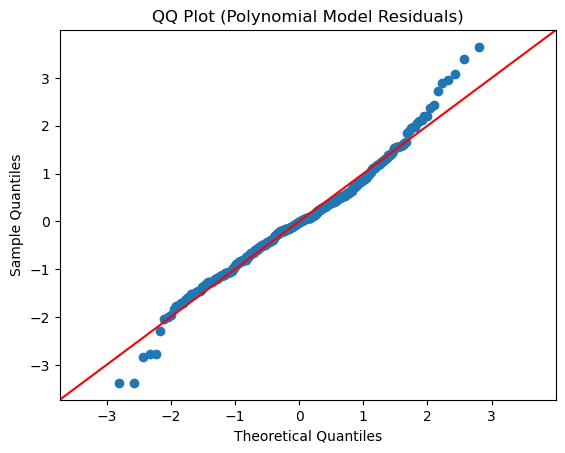

In [21]:
# Simple and Polynomial Regression on Auto dataset (Horsepower vs MPG)

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from ISLP import load_data

# Load Auto dataset
auto = load_data('Auto')
auto = auto.dropna()

# ------------------------------
# Simple Linear Regression
# ------------------------------

# Predictor and response
X_simple = sm.add_constant(auto['horsepower'])
y = auto['mpg']

# Fit model
model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())

# Predict mpg for horsepower = 98 :

new_X = pd.DataFrame({'const': [1], 'horsepower': [98]})  # With this version using the same column names as training
# or below cod
new_X = sm.add_constant(pd.DataFrame({'horsepower': [98]}), has_constant='add') # OR you can ensure column names match automatically with (# This will work consistently)
#new_X = sm.add_constant(pd.DataFrame({'horsepower': [98]})) # this bring error BECAUSE When you use sm.add_constant() before training, the model expects a const column for predictions too.
pred = model_simple.get_prediction(new_X)
print("\nPrediction for horsepower = 98:")
print(pred.summary_frame(alpha=0.05))


# Plot with regression line
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(auto['horsepower'], auto['mpg'], alpha=0.5, label='Data')
intercept, slope = model_simple.params
ax.axline((0, intercept), slope=slope, color='red', label='Simple Regression Line')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower (Simple Linear Regression)')
ax.legend()
plt.grid(True)
plt.show()

# Residual plot
residuals = model_simple.resid
fitted = model_simple.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Simple Model)')
plt.grid(True)
plt.show()

# QQ plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot (Simple Model Residuals)')
plt.show()

# ------------------------------
# Polynomial Regression (Degree 2)
# ------------------------------

# Add polynomial term
auto['horsepower2'] = auto['horsepower'] ** 2
X_poly = sm.add_constant(auto[['horsepower', 'horsepower2']])

# Fit model
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

# Plot fitted polynomial regression curve
x_range = np.linspace(auto['horsepower'].min(), auto['horsepower'].max(), 100)
x_poly = pd.DataFrame({'horsepower': x_range, 'horsepower2': x_range**2})
x_poly = sm.add_constant(x_poly)
y_pred = model_poly.predict(x_poly)

plt.figure(figsize=(8, 6))
plt.scatter(auto['horsepower'], auto['mpg'], alpha=0.5, label='Data')
plt.plot(x_range, y_pred, color='green', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs. Horsepower (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Residuals of polynomial fit
resid_poly = model_poly.resid
fitted_poly = model_poly.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(fitted_poly, resid_poly, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted (Polynomial Model)')
plt.grid(True)
plt.show()

# QQ plot of polynomial residuals
sm.qqplot(resid_poly, line='45', fit=True)
plt.title('QQ Plot (Polynomial Model Residuals)')
plt.show()


 ## SECOND OPTION TO ANSWER THIS QUESTION 8

In [22]:
# ✅ Step 0: Load packages and dataset
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data

# Load the Auto dataset
Auto = load_data('Auto')
Auto = Auto.dropna()  # Drop any missing values
Auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [24]:
#✅ (a) Fit Simple Linear Regression: mpg ~ horsepower


# Step 1: Define predictor and response

X = sm.add_constant(Auto['horsepower'])  # add intercept
y = Auto['mpg']

In [25]:
## Step 2: Fit (train) the model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           7.03e-81
Time:                        06:59:46   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [28]:
#📝 Interpretation of Output:
#i. Is there a relationship between horsepower and mpg?
#Yes: The p-value for horsepower is very small (typically < 0.001), so the relationship is statistically significant.

#ii. How strong is the relationship?
#Look at R-squared: ~0.60 means that 60% of the variance in mpg is explained by horsepower. Moderate strength.

#iii. Positive or negative relationship?
#The coefficient for horsepower is negative, so as horsepower increases, mpg decreases → negative relationship.

#iv. Predict mpg for horsepower = 98, with 95% CI and PI 



# Predict mpg for horsepower = 98
#new_X = sm.add_constant(pd.DataFrame({'horsepower': [98]}))  # error in this line is that your model was trained with two columns: const and horsepower, but you're passing only one column when predicting (horsepower alone), causing the shape mismatch

new_X = pd.DataFrame({'const': [1], 'horsepower': [98]}) # Ensures both 'const' and 'horsepower' are present, and matches model input
#or
#new_X = sm.add_constant(pd.DataFrame({'horsepower': [98]}), has_constant='add') # This guarantees the same structure as your training data

pred = model.get_prediction(new_X)
summary_frame = pred.summary_frame(alpha=0.05)

print(summary_frame)


        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


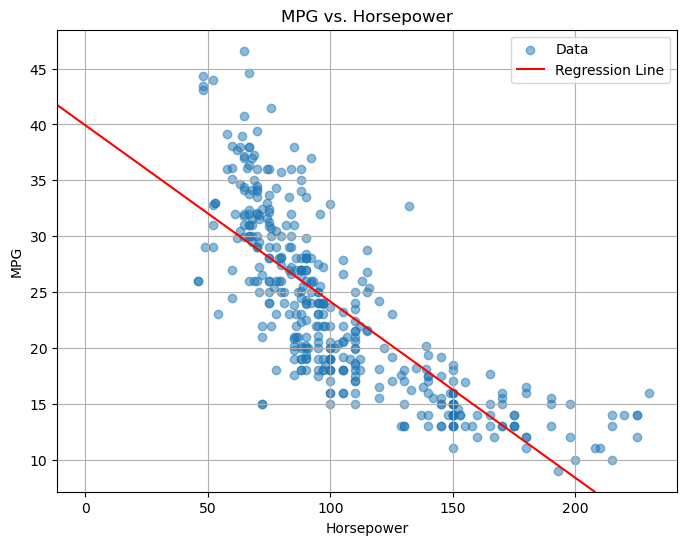

In [29]:
# ✅ (b) Plot with Regression Line

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(Auto['horsepower'], Auto['mpg'], alpha=0.5, label='Data')

# Plot regression line
intercept, slope = model.params
ax.axline((0, intercept), slope=slope, color='red', label='Regression Line')

ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
ax.set_title('MPG vs. Horsepower')
ax.legend()
plt.grid(True)
plt.show()


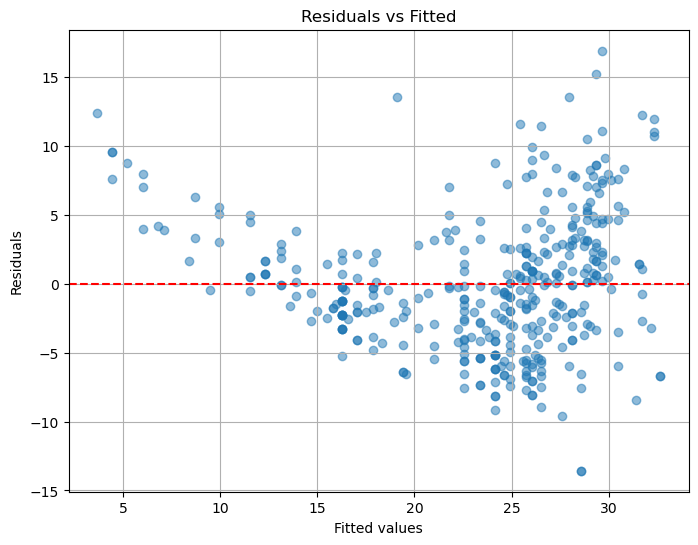

In [30]:
#✅ (c) Diagnostic Plots
#1. Residual Plot

residuals = model.resid
fitted = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.scatter(fitted, residuals, alpha=0.5)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True)
plt.show()


In [31]:
#Interpretation:

#If residuals are randomly scattered, assumptions are valid.

#If there’s a curve → non-linearity → model may be misspecified.

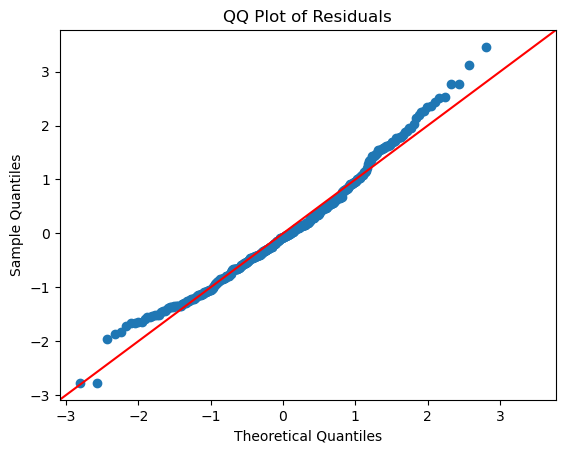

In [32]:
# 2. QQ Plot (Normality of residuals)

sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()


In [33]:
#Interpretation:

#Points should fall along the 45° line.

#Deviations at ends → heavy tails or non-normality

In [34]:
# ✅ Summary of Findings

#Relationship?: Yes, significant (p < 0.001)
#strength? : Moderate (R² ≈ 0.60)
#Direction? : Negative: higher horsepower → lower mpg
#Prediction at 98 HP? : Specific predicted mpg with CI and PI
#Model problems?:Possibly nonlinearity, visible in residual plot

# CHAPTER 3, QUESTION 13

Length of y: 100
Model parameters: β0 = -1, β1 = 0.5


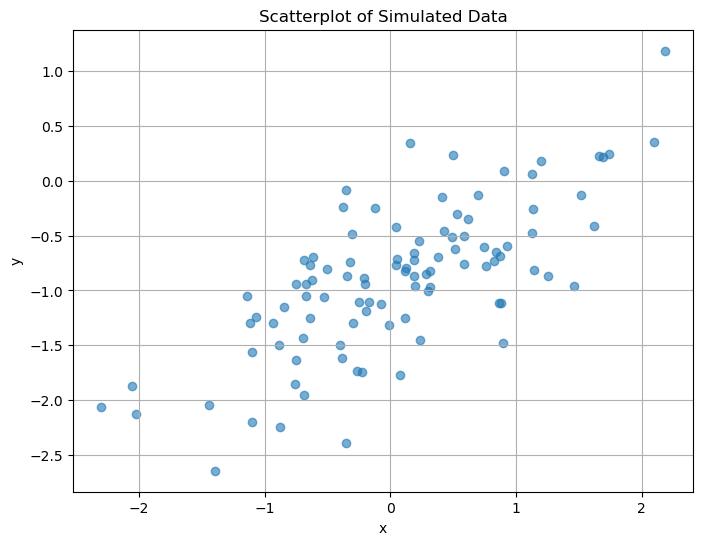

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.20e-17
Time:                        07:26:43   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9265      0.047    -19.717      0.0

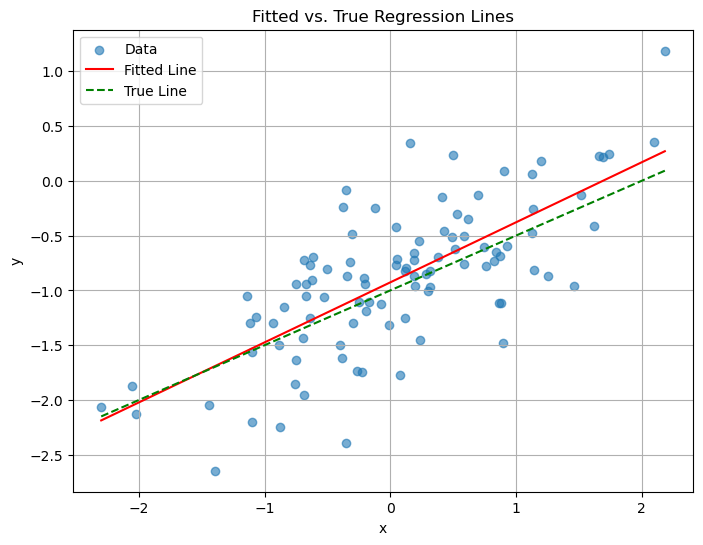

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           2.83e-16
Time:                        07:26:44   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9325      0.058    -16.158      0.0

In [36]:
# Simulated Linear Regression with Noise Variations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)  # For reproducibility

# --------------------------------------------
# (a), (b), (c): Simulate x, noise (eps), and y
# --------------------------------------------

x = np.random.normal(0, 1, 100)                          # (a) X ~ N(0, 1)
eps = np.random.normal(0, np.sqrt(0.25), 100)            # (b) eps ~ N(0, 0.25)
y = -1 + 0.5 * x + eps                                   # (c) y = -1 + 0.5x + ε

print("Length of y:", len(y))
print("Model parameters: β0 = -1, β1 = 0.5")

# --------------------------------------------
# (d): Scatterplot of x vs y
# --------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.6, label='Simulated Data')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Scatterplot of Simulated Data")
plt.grid(True)
plt.show()

# --------------------------------------------
# (e): Fit simple linear regression
# --------------------------------------------
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

# Compare estimates with true values β0 = -1, β1 = 0.5

# --------------------------------------------
# (f): Plot regression lines
# --------------------------------------------
x_vals = np.linspace(min(x), max(x), 100)
X_plot = sm.add_constant(x_vals)
y_hat = model.predict(X_plot)
y_true = -1 + 0.5 * x_vals

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, alpha=0.6, label='Data')
ax.plot(x_vals, y_hat, color='red', label='Fitted Line')
ax.plot(x_vals, y_true, color='green', linestyle='--', label='True Line')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Fitted vs. True Regression Lines")
ax.legend()
plt.grid(True)
plt.show()

# --------------------------------------------
# (g): Polynomial regression (x and x^2)
# --------------------------------------------
x2 = x ** 2
X_poly = sm.add_constant(np.column_stack((x, x2)))
model_poly = sm.OLS(y, X_poly).fit()
print(model_poly.summary())

# --------------------------------------------
# (h): Less noisy data (variance = 0.05)
# --------------------------------------------
eps_less = np.random.normal(0, np.sqrt(0.05), 100)
y_less = -1 + 0.5 * x + eps_less
model_less = sm.OLS(y_less, X).fit()
print("\nLess noisy data model:")
print(model_less.summary())

# --------------------------------------------
# (i): More noisy data (variance = 1.0)
# --------------------------------------------
eps_more = np.random.normal(0, np.sqrt(1.0), 100)
y_more = -1 + 0.5 * x + eps_more
model_more = sm.OLS(y_more, X).fit()
print("\nMore noisy data model:")
print(model_more.summary())

# --------------------------------------------
# (j): Confidence intervals for β0 and β1
# --------------------------------------------
print("\n95% Confidence Intervals")
print("Original Data:")
print(model.conf_int())
print("\nLess Noisy:")
print(model_less.conf_int())
print("\nMore Noisy:")
print(model_more.conf_int())


# CHAPTER 5 , QUESTION 6

In [37]:
# Logistic Regression with Standard Errors via sm.GLM and Bootstrap

import pandas as pd
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from sklearn.utils import resample

# Set seed for reproducibility
np.random.seed(42)

# Load Default dataset
default = load_data('Default')

# Convert 'default' to binary numeric format
default['default'] = default['default'].map({'No': 0, 'Yes': 1})

# --------------------------------------------
# (a) Logistic regression using sm.GLM
# --------------------------------------------
X = default[['income', 'balance']]
X = sm.add_constant(X)
y = default['default']

model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print("Standard errors from sm.GLM():")
print(model.bse)

# --------------------------------------------
# (b) Define bootstrap function
# --------------------------------------------
def boot_fn(data, index):
    sample = data.iloc[index]
    X_boot = sm.add_constant(sample[['income', 'balance']])
    y_boot = sample['default']
    model_boot = sm.GLM(y_boot, X_boot, family=sm.families.Binomial()).fit()
    return model_boot.params[['income', 'balance']]

# --------------------------------------------
# (c) Bootstrap to estimate standard errors
# --------------------------------------------
B = 1000
coefs = np.zeros((B, 2))
for i in range(B):
    idx = resample(range(len(default)), replace=True)
    coefs[i, :] = boot_fn(default, idx)

# Calculate bootstrap standard errors
bootstrap_se = pd.Series(coefs.std(axis=0), index=['income', 'balance'])

print("\nStandard errors from bootstrap:")
print(bootstrap_se)

# --------------------------------------------
# (d) Comparison
# --------------------------------------------
print("\nComparison:")
print(pd.DataFrame({
    'GLM SE': model.bse[['income', 'balance']],
    'Bootstrap SE': bootstrap_se
}))


Standard errors from sm.GLM():
const      0.434772
income     0.000005
balance    0.000227
dtype: float64

Standard errors from bootstrap:
income     0.000005
balance    0.000232
dtype: float64

Comparison:
           GLM SE  Bootstrap SE
income   0.000005      0.000005
balance  0.000227      0.000232


# CHAPTER 5 QUESTION 8

n = 100, p = 1
Model: Y = x - 2x^2 + ε, where ε ~ N(0, 1)


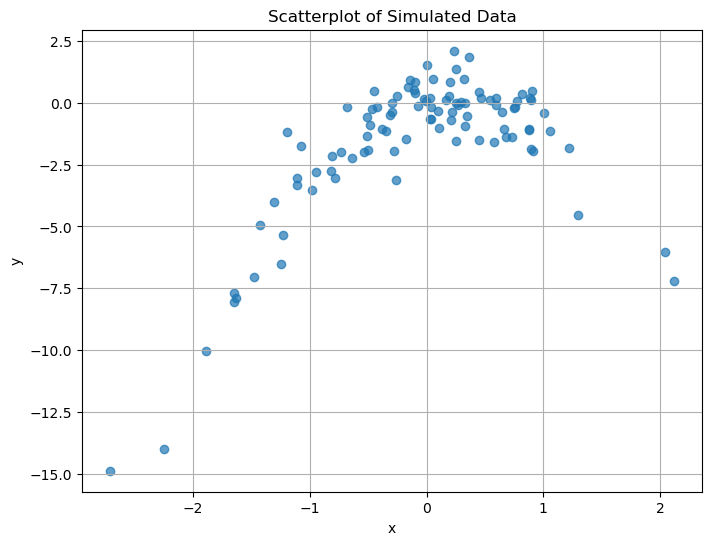


LOOCV Errors (Seed 0):
Degree 1: MSE = 6.6330
Degree 2: MSE = 1.1229
Degree 3: MSE = 1.3018
Degree 4: MSE = 1.3324

LOOCV Errors (Seed 42):
Degree 1: MSE = 6.6330
Degree 2: MSE = 1.1229
Degree 3: MSE = 1.3018
Degree 4: MSE = 1.3324

Lowest LOOCV error was for degree 2 polynomial.

Statistical significance of coefficients:

Degree 1 Polynomial Model
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           1.04e-09
Time:                        07:41:06   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:       

In [38]:
# LOOCV with Simulated Polynomial Models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error

# --------------------------------------------
# (a) Generate Simulated Data
# --------------------------------------------
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

n = len(x)
p = 1  # Only one predictor x is used

print(f"n = {n}, p = {p}")
print("Model: Y = x - 2x^2 + ε, where ε ~ N(0, 1)")

# --------------------------------------------
# (b) Scatterplot of x vs y
# --------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of Simulated Data")
plt.grid(True)
plt.show()

# --------------------------------------------
# (c) LOOCV for 4 Polynomial Models
# --------------------------------------------
np.random.seed(0)  # Ensure reproducibility

data = pd.DataFrame({'x': x, 'y': y})
loo = LeaveOneOut()

loocv_errors = []

for degree in range(1, 5):
    mse_list = []
    for train_index, test_index in loo.split(data):
        train = data.iloc[train_index]
        test = data.iloc[test_index]

        # Generate polynomial features
        X_train = np.vander(train['x'], N=degree+1, increasing=True)
        X_test = np.vander(test['x'], N=degree+1, increasing=True)

        model = sm.OLS(train['y'], X_train).fit()
        pred = model.predict(X_test)
        mse = (test['y'].values[0] - pred[0]) ** 2
        mse_list.append(mse)

    loocv_errors.append(np.mean(mse_list))

print("\nLOOCV Errors (Seed 0):")
for i, err in enumerate(loocv_errors, 1):
    print(f"Degree {i}: MSE = {err:.4f}")

# --------------------------------------------
# (d) Repeat with a different seed
# --------------------------------------------
np.random.seed(42)

loocv_errors2 = []

for degree in range(1, 5):
    mse_list = []
    for train_index, test_index in loo.split(data):
        train = data.iloc[train_index]
        test = data.iloc[test_index]

        X_train = np.vander(train['x'], N=degree+1, increasing=True)
        X_test = np.vander(test['x'], N=degree+1, increasing=True)

        model = sm.OLS(train['y'], X_train).fit()
        pred = model.predict(X_test)
        mse = (test['y'].values[0] - pred[0]) ** 2
        mse_list.append(mse)

    loocv_errors2.append(np.mean(mse_list))

print("\nLOOCV Errors (Seed 42):")
for i, err in enumerate(loocv_errors2, 1):
    print(f"Degree {i}: MSE = {err:.4f}")

# --------------------------------------------
# (e) Identify lowest LOOCV error
# --------------------------------------------
best_degree = np.argmin(loocv_errors) + 1
print(f"\nLowest LOOCV error was for degree {best_degree} polynomial.")

# --------------------------------------------
# (f) Fit all models and assess coefficient significance
# --------------------------------------------
print("\nStatistical significance of coefficients:")
for degree in range(1, 5):
    X_all = np.vander(data['x'], N=degree+1, increasing=True)
    model_all = sm.OLS(data['y'], X_all).fit()
    print(f"\nDegree {degree} Polynomial Model")
    print(model_all.summary())


# CHAPTER 5 QUESTION 9

In [39]:
# Bootstrap and Summary Statistics on Boston Housing Dataset

import numpy as np
import pandas as pd
from ISLP import load_data
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1)

# Load Boston dataset
boston = load_data('Boston')
medv = boston['medv']
n = len(medv)

# --------------------------------------------
# (a) Estimate population mean of medv
# --------------------------------------------
mu_hat = medv.mean()
print(f"(a) Estimated mean (mû): {mu_hat:.4f}")

# --------------------------------------------
# (b) Estimate standard error of mû using formula
# --------------------------------------------
std_err = medv.std(ddof=1) / np.sqrt(n)
print(f"(b) Standard error of mû: {std_err:.4f}")

# --------------------------------------------
# (c) Estimate standard error using bootstrap
# --------------------------------------------
B = 1000
boot_means = np.zeros(B)
for i in range(B):
    sample = medv.sample(n, replace=True)
    boot_means[i] = sample.mean()

boot_se = boot_means.std()
print(f"(c) Bootstrap standard error of mû: {boot_se:.4f}")

# --------------------------------------------
# (d) Bootstrap 95% Confidence Interval
# --------------------------------------------
ci_lower = mu_hat - 2 * boot_se
ci_upper = mu_hat + 2 * boot_se
print(f"(d) 95% CI using bootstrap: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Also compute using standard error formula
ci_lower_formula = mu_hat - 2 * std_err
ci_upper_formula = mu_hat + 2 * std_err
print(f"    95% CI using std error formula: [{ci_lower_formula:.4f}, {ci_upper_formula:.4f}]")

# --------------------------------------------
# (e) Estimate median of medv
# --------------------------------------------
mu_med = medv.median()
print(f"(e) Estimated median (mûmed): {mu_med:.4f}")

# --------------------------------------------
# (f) Bootstrap SE of median
# --------------------------------------------
boot_meds = np.zeros(B)
for i in range(B):
    sample = medv.sample(n, replace=True)
    boot_meds[i] = sample.median()

boot_se_median = boot_meds.std()
print(f"(f) Bootstrap standard error of median: {boot_se_median:.4f}")

# --------------------------------------------
# (g) Estimate 10th percentile of medv
# --------------------------------------------
mu_0_1 = np.percentile(medv, 10)
print(f"(g) 10th percentile of medv (mû0.1): {mu_0_1:.4f}")

# --------------------------------------------
# (h) Bootstrap SE of 10th percentile
# --------------------------------------------
boot_p10 = np.zeros(B)
for i in range(B):
    sample = medv.sample(n, replace=True)
    boot_p10[i] = np.percentile(sample, 10)

boot_se_p10 = boot_p10.std()
print(f"(h) Bootstrap standard error of 10th percentile: {boot_se_p10:.4f}")


(a) Estimated mean (mû): 22.5328
(b) Standard error of mû: 0.4089
(c) Bootstrap standard error of mû: 0.4124
(d) 95% CI using bootstrap: [21.7080, 23.3576]
    95% CI using std error formula: [21.7151, 23.3505]
(e) Estimated median (mûmed): 21.2000
(f) Bootstrap standard error of median: 0.3845
(g) 10th percentile of medv (mû0.1): 12.7500
(h) Bootstrap standard error of 10th percentile: 0.4898


# CHAPTER 5 QUESTION 7

In [43]:
# LOOCV Logistic Regression on Weekly Dataset

import pandas as pd
import numpy as np
from ISLP import load_data
import statsmodels.api as sm

# Load Weekly data
weekly = load_data('Weekly')

# Encode response variable: 'Up' = 1, 'Down' = 0
weekly['Direction'] = weekly['Direction'].map({'Up': 1, 'Down': 0})

# (a) Fit logistic regression using Lag1 and Lag2
X = sm.add_constant(weekly[['Lag1', 'Lag2']])
y = weekly['Direction']
model_full = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print("(a) Full model summary:")
print(model_full.summary())

# (b) Fit model without the first observation
X_train = X.iloc[1:]
y_train = y.iloc[1:]
model_b = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()

# (c) Predict direction for first observation
X_test = X.iloc[0:1]
y_test = y.iloc[0]
pred_prob = model_i.predict(X_test).iloc[0]
pred_dir = 1 if pred_prob > 0.5 else 0
correct = pred_dir == y_test
print(f"\n(c) Prediction for first observation: {'Correct' if correct else 'Incorrect'}")

# (d) LOOCV loop
n = len(weekly)
errors = np.zeros(n)

for i in range(n):
    X_train = X.drop(i)
    y_train = y.drop(i)
    X_test = X.iloc[i:i+1]
    y_test = y.iloc[i]
    model_i = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    pred_prob = model_i.predict(X_test).iloc[0]
    pred_dir = 1 if pred_prob > 0.5 else 0
    errors[i] = int(pred_dir != y_test)

# (e) Average LOOCV error
loocv_error = errors.mean()
print(f"\n(e) LOOCV test error estimate: {loocv_error:.4f}")


(a) Full model summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1086
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -744.11
Date:                Wed, 25 Jun 2025   Deviance:                       1488.2
Time:                        07:58:32   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.007303
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0

# CHAPTER 5, QUESTION 5

In [46]:
# Validation Set Approach with Logistic Regression on Default Dataset

import pandas as pd
import numpy as np
from ISLP import load_data
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load and preprocess data
np.random.seed(1)
default = load_data('Default')
default['default'] = default['default'].map({'Yes': 1, 'No': 0})

# (a) Fit logistic regression using income and balance
X_full = sm.add_constant(default[['income', 'balance']])
y = default['default']
model = sm.GLM(y, X_full, family=sm.families.Binomial()).fit()
print("(a) Logistic Regression Summary (income + balance):")
print(model.summary())

# (b-c) Validation Set Approach without student
def run_validation(random_state):
    X = default[['income', 'balance']]
    y = default['default']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=random_state)

    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val)

    model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    probs = model.predict(X_val)
    y_pred = (probs > 0.5).astype(int)
    return 1 - accuracy_score(y_val, y_pred)

errors = [run_validation(seed) for seed in [1, 2, 3]]
print("\n(c) Validation errors without student:")
for i, err in enumerate(errors, 1):
    print(f"  Split {i}: {err:.4f}")
print(f"  Average Error: {np.mean(errors):.4f}")

# (d) Validation Set Approach with student dummy variable
def run_validation_with_student(random_state):
    df = default.copy()
    df['student'] = (df['student'] == 'Yes').astype(int)  # Convert to numeric
    X = df[['income', 'balance', 'student']]
    y = df['default']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=random_state)

    X_train = sm.add_constant(X_train)
    X_val = sm.add_constant(X_val)

    model = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
    probs = model.predict(X_val)
    y_pred = (probs > 0.5).astype(int)
    return 1 - accuracy_score(y_val, y_pred)

errors_student = [run_validation_with_student(seed) for seed in [1, 2, 3]]
print("\n(d) Validation errors with student:")
for i, err in enumerate(errors_student, 1):
    print(f"  Split {i}: {err:.4f}")
print(f"  Average Error with student: {np.mean(errors_student):.4f}")



(a) Logistic Regression Summary (income + balance):
                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.48
Date:                Wed, 25 Jun 2025   Deviance:                       1579.0
Time:                        08:04:14   Pearson chi2:                 6.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1256
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


# CHAPTER 6, question 8


(c) Forward Stepwise Selection Models and Cp:
Selected vars: ['X3'], Cp: -73.054
Selected vars: ['X3', 'X'], Cp: -78.994
Selected vars: ['X3', 'X', 'X2'], Cp: -85.068
Final selected model coefficients:
const    0.942803
X3       0.435700
X        2.114584
X2      -1.047094
dtype: float64

(d) Backward Stepwise Selection Models and Cp:
Selected vars: ['X', 'X2', 'X3'], Cp: -85.068
Final selected model coefficients:
const    0.942803
X        2.114584
X2      -1.047094
X3       0.435700
dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.463271138768107, tolerance: 0.13130294851128974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2940539246110916, tolerance: 0.13130294851128974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9301355139117504, tolerance: 0.13130294851128974
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617

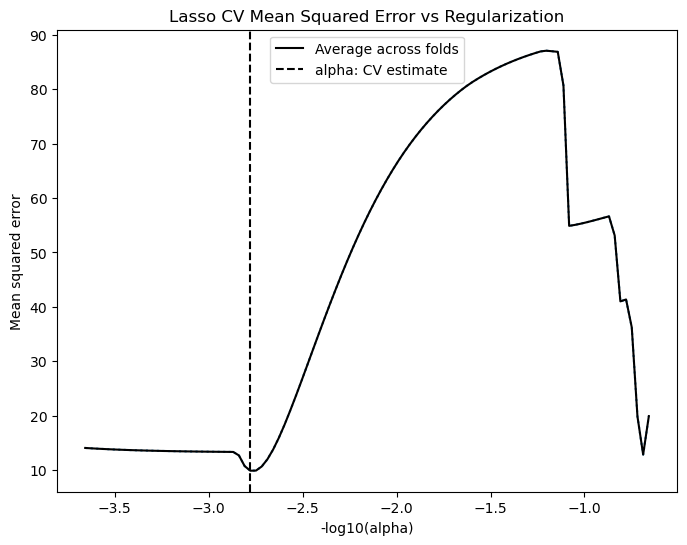


(e) Lasso selected alpha: 600.5142452931486
Lasso coefficients:
X: 0.0000
X2: -0.0000
X3: 0.0000
X4: -0.0000
X5: 0.0000
X6: -0.0000
X7: 0.0000
X8: -0.0000
X9: 0.0000
X10: -0.0008

(f) Forward stepwise selection on Y = beta0 + beta7*X7 + noise
Final selected variables: ['X7']
Coefficients:
const    0.904847
X7       2.998285
dtype: float64

Lasso coefficients for new Y:
X: 0.0000
X2: -0.0000
X3: 0.0000
X4: -0.0000
X5: 0.0000
X6: -0.0000
X7: 0.0000
X8: -0.0000
X9: 0.3012
X10: -0.0359


In [47]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from itertools import combinations

# (a) Create RNG and generate X and noise epsilon
np.random.seed(1)
n = 100
rng = np.random.default_rng(1)
X = rng.normal(size=n)
epsilon = rng.normal(scale=1, size=n)  # noise with variance 1

# (b) Generate response Y using chosen coefficients for up to cubic terms
beta0, beta1, beta2, beta3 = 1, 2, -1, 0.5
Y = beta0 + beta1*X + beta2*X**2 + beta3*X**3 + epsilon

# Prepare dataframe with predictors X, X^2, ..., X^10
df = pd.DataFrame({'X': X})
for degree in range(2, 11):
    df[f'X{degree}'] = X ** degree

# Add response
df['Y'] = Y

# Helper function to fit OLS and compute Cp statistic
def calculate_cp(model, rss, sigma_sq, n, p):
    """Calculate Mallows Cp statistic"""
    return (rss / sigma_sq) - (n - 2 * p)

# (c) Forward stepwise selection based on Cp
def forward_stepwise_selection(X, y):
    n, p = X.shape
    sigma_sq = np.var(y)  # estimate variance of noise using variance of y (simple approx)
    remaining = list(X.columns)
    selected = []
    current_score = np.inf
    best_models = []
    
    while remaining and len(selected) < p:
        scores_with_candidates = []
        for candidate in remaining:
            formula_cols = selected + [candidate]
            X_subset = sm.add_constant(X[formula_cols])
            model = sm.OLS(y, X_subset).fit()
            rss = ((model.resid) ** 2).sum()
            cp = calculate_cp(model, rss, sigma_sq, n, len(formula_cols) + 1)
            scores_with_candidates.append((cp, candidate, model))
        scores_with_candidates.sort()
        best_cp, best_candidate, best_model = scores_with_candidates[0]
        if best_cp < current_score:
            current_score = best_cp
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            best_models.append((best_cp, selected.copy(), best_model))
        else:
            break
    return best_models

# Run forward stepwise
X_vars = df.drop(columns='Y')
y = df['Y']
forward_results = forward_stepwise_selection(X_vars, y)

print("\n(c) Forward Stepwise Selection Models and Cp:")
for cp, predictors, model in forward_results:
    print(f"Selected vars: {predictors}, Cp: {cp:.3f}")
print(f"Final selected model coefficients:\n{forward_results[-1][2].params}")

# (d) Backward stepwise selection based on Cp
def backward_stepwise_selection(X, y):
    n, p = X.shape
    sigma_sq = np.var(y)
    selected = list(X.columns)
    current_score = np.inf
    best_models = []
    
    while len(selected) > 0:
        scores_with_candidates = []
        for combo_size in range(len(selected), 0, -1):
            for combo in combinations(selected, combo_size):
                X_subset = sm.add_constant(X[list(combo)])
                model = sm.OLS(y, X_subset).fit()
                rss = ((model.resid) ** 2).sum()
                cp = calculate_cp(model, rss, sigma_sq, n, len(combo) + 1)
                scores_with_candidates.append((cp, combo, model))
        scores_with_candidates.sort()
        best_cp, best_combo, best_model = scores_with_candidates[0]
        if best_cp < current_score:
            current_score = best_cp
            selected = list(best_combo)
            best_models.append((best_cp, selected.copy(), best_model))
        else:
            break
    return best_models

backward_results = backward_stepwise_selection(X_vars, y)

print("\n(d) Backward Stepwise Selection Models and Cp:")
for cp, predictors, model in backward_results:
    print(f"Selected vars: {predictors}, Cp: {cp:.3f}")
print(f"Final selected model coefficients:\n{backward_results[-1][2].params}")

# (e) Lasso with cross-validation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_lasso = X_vars.values
y_lasso = y.values

lasso_cv = LassoCV(cv=5, random_state=1).fit(X_lasso, y_lasso)

# Plot cross-validation error vs alpha
m_log_alphas = -np.log10(lasso_cv.alphas_)

plt.figure(figsize=(8, 6))
plt.plot(m_log_alphas, np.mean(lasso_cv.mse_path_, axis=1), ':')
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=1), 'k', label='Average across folds')
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle='--', color='k', label='alpha: CV estimate')
plt.xlabel('-log10(alpha)')
plt.ylabel('Mean squared error')
plt.title('Lasso CV Mean Squared Error vs Regularization')
plt.legend()
plt.show()

print("\n(e) Lasso selected alpha:", lasso_cv.alpha_)
print("Lasso coefficients:")
for name, coef in zip(X_vars.columns, lasso_cv.coef_):
    print(f"{name}: {coef:.4f}")

# (f) Generate new Y with only X7 and noise
beta0 = 1
beta7 = 3
Y_new = beta0 + beta7*df['X7'] + epsilon

# Forward stepwise on new Y
y_new = Y_new
forward_results_new = forward_stepwise_selection(X_vars, y_new)

print("\n(f) Forward stepwise selection on Y = beta0 + beta7*X7 + noise")
print(f"Final selected variables: {forward_results_new[-1][1]}")
print(f"Coefficients:\n{forward_results_new[-1][2].params}")

# Lasso on new Y
lasso_cv_new = LassoCV(cv=5, random_state=1).fit(X_lasso, y_new)

print("\nLasso coefficients for new Y:")
for name, coef in zip(X_vars.columns, lasso_cv_new.coef_):
    print(f"{name}: {coef:.4f}")


# CHAPTER 6 QUESTION 9

In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load College data (replace with actual data loading method)
# For example, from ISLR package, or CSV file
# Here we simulate loading:
college = pd.read_csv('College.csv', index_col=0)  # Adjust path as necessary

# Target variable: 'Apps' (number of applications)
y = college['Apps'].values

# Predictors: all other variables except 'Apps'
X = college.drop(columns=['Apps'])

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

# Standardize predictors for methods sensitive to scale (ridge, lasso, PCR, PLS)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# (b) Linear regression with least squares
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
test_error_lin = mean_squared_error(y_test, y_pred_lin)
print(f"(b) Least squares test MSE: {test_error_lin:.3f}")

# (c) Ridge regression with cross-validation to select alpha (λ)
alphas = 10**np.linspace(10, -2, 100)  # Wide range of lambdas
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
test_error_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"(c) Ridge regression test MSE: {test_error_ridge:.3f}")
print(f"    Best alpha: {ridge_cv.alpha_:.5f}")

# (d) Lasso regression with cross-validation to select alpha (λ)
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
test_error_lasso = mean_squared_error(y_test, y_pred_lasso)
nonzero_coefs = np.sum(lasso_cv.coef_ != 0)
print(f"(d) Lasso regression test MSE: {test_error_lasso:.3f}")
print(f"    Best alpha: {lasso_cv.alpha_:.5f}")
print(f"    Number of non-zero coefficients: {nonzero_coefs}")

# (e) Principal Components Regression (PCR)

# We'll try PCR with components from 1 to 20, choose M by CV
m_max = min(20, X_train_scaled.shape[1])
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_pcr = []
for m in range(1, m_max + 1):
    mse_fold = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_t, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_t, y_val = y_train[train_idx], y_train[val_idx]
        pca = PCA(n_components=m)
        X_t_pca = pca.fit_transform(X_t)
        X_val_pca = pca.transform(X_val)
        linreg_pcr = LinearRegression().fit(X_t_pca, y_t)
        y_val_pred = linreg_pcr.predict(X_val_pca)
        mse_fold.append(mean_squared_error(y_val, y_val_pred))
    mse_pcr.append(np.mean(mse_fold))

best_m_pcr = np.argmin(mse_pcr) + 1
# Fit PCR on full training data with best M
pca_final = PCA(n_components=best_m_pcr)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)
linreg_pcr_final = LinearRegression().fit(X_train_pca, y_train)
y_pred_pcr = linreg_pcr_final.predict(X_test_pca)
test_error_pcr = mean_squared_error(y_test, y_pred_pcr)
print(f"(e) PCR test MSE: {test_error_pcr:.3f}")
print(f"    Number of components selected (M): {best_m_pcr}")

# (f) Partial Least Squares (PLS) Regression

mse_pls = []
for m in range(1, m_max + 1):
    mse_fold = []
    for train_idx, val_idx in kf.split(X_train_scaled):
        X_t, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
        y_t, y_val = y_train[train_idx], y_train[val_idx]
        pls = PLSRegression(n_components=m)
        pls.fit(X_t, y_t)
        y_val_pred = pls.predict(X_val)
        mse_fold.append(mean_squared_error(y_val, y_val_pred))
    mse_pls.append(np.mean(mse_fold))

best_m_pls = np.argmin(mse_pls) + 1
pls_final = PLSRegression(n_components=best_m_pls)
pls_final.fit(X_train_scaled, y_train)
y_pred_pls = pls_final.predict(X_test_scaled)
test_error_pls = mean_squared_error(y_test, y_pred_pls)
print(f"(f) PLS test MSE: {test_error_pls:.3f}")
print(f"    Number of components selected (M): {best_m_pls}")

# (g) Comments
print("\n(g) Comments:")
print(f"Test MSEs range from {min(test_error_lin, test_error_ridge, test_error_lasso, test_error_pcr, test_error_pls):.3f} "
      f"to {max(test_error_lin, test_error_ridge, test_error_lasso, test_error_pcr, test_error_pls):.3f}.")
print("The test errors are fairly close, indicating similar predictive performance.")
print("Ridge and lasso regression provide some regularization, helping with multicollinearity and feature selection respectively.")
print("PCR and PLS reduce dimensionality which can also improve performance and interpretability.")


(b) Least squares test MSE: 364360.865
(c) Ridge regression test MSE: 364144.474
    Best alpha: 0.09326
(d) Lasso regression test MSE: 354255.531
    Best alpha: 6.19154
    Number of non-zero coefficients: 12
(e) PCR test MSE: 364360.865
    Number of components selected (M): 17
(f) PLS test MSE: 364628.280
    Number of components selected (M): 15

(g) Comments:
Test MSEs range from 354255.531 to 364628.280.
The test errors are fairly close, indicating similar predictive performance.
Ridge and lasso regression provide some regularization, helping with multicollinearity and feature selection respectively.
PCR and PLS reduce dimensionality which can also improve performance and interpretability.


## ===========from here, code are not running, need to be addressed==============================

# CHAPTER 6 QUESTION 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations

np.random.seed(1)

# (a) Generate data
n = 1000
p = 20
X = np.random.randn(n, p)
beta = np.zeros(p)
beta[:5] = [1.5, -2, 0, 0, 3]  # some coefficients non-zero, rest zero
epsilon = np.random.randn(n)
y = X @ beta + epsilon

# (b) Split data: 100 train, 900 test
train_idx = np.random.choice(range(n), size=100, replace=False)
test_idx = np.setdiff1d(range(n), train_idx)

X_train = X[train_idx]
y_train = y[train_idx]
X_test = X[test_idx]
y_test = y[test_idx]

def best_subset_selection(X, y, max_features=None):
    """Perform best subset selection up to max_features."""
    if max_features is None:
        max_features = X.shape[1]
    results = []
    for k in range(1, max_features + 1):
        best_mse = np.inf
        best_combo = None
        # check all combos of size k
        for combo in combinations(range(X.shape[1]), k):
            model = LinearRegression()
            model.fit(X[:, combo], y)
            y_pred = model.predict(X[:, combo])
            mse = mean_squared_error(y, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_combo = combo
        results.append({'num_features': k, 'best_combo': best_combo, 'train_mse': best_mse})
    return results

max_feats = 15  # limit max features for speed

# (c) Best subset on training data (measure training MSE)
train_results = best_subset_selection(X_train, y_train, max_features=max_feats)

# (d) Compute test MSE for each selected model
test_mse = []
for res in train_results:
    combo = res['best_combo']
    model = LinearRegression()
    model.fit(X_train[:, combo], y_train)
    y_pred_test = model.predict(X_test[:, combo])
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_mse.append(mse_test)

# Print training and test MSE for each model size
print("Model Size | Training MSE | Test MSE")
for i, res in enumerate(train_results):
    print(f"{res['num_features']:10d} | {res['train_mse']:.4f}     | {test_mse[i]:.4f}")

# (g) Plot training and test MSE
plt.figure(figsize=(10,6))
plt.plot([r['num_features'] for r in train_results], [r['train_mse'] for r in train_results], label='Training MSE', marker='o')
plt.plot([r['num_features'] for r in train_results], test_mse, label='Test MSE', marker='o')
plt.xlabel('Number of Features in Model')
plt.ylabel('Mean Squared Error')
plt.title('Best Subset Selection: Training and Test MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from itertools import combinations

# Load Boston data
boston = load_boston()
X_full = pd.DataFrame(boston.data, columns=boston.feature_names)
y_full = pd.Series(boston.target, name='MEDV')

# Predict crime rate 'CRIM'
y = X_full['CRIM']
X = X_full.drop(columns=['CRIM'])

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Simple linear regression on all features
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Linear Regression Test MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Lasso Regression with CV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print(f"Lasso Regression Test MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
print(f"Selected alpha: {lasso.alpha_:.5f}")
print(f"Number of features selected by Lasso: {(lasso.coef_ != 0).sum()}")

# Ridge Regression with CV
alphas = np.logspace(-6, 6, 100)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print(f"Ridge Regression Test MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
print(f"Selected alpha: {ridge.alpha_:.5f}")

# PCR with CV to choose components
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_cv = []
for m in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    fold_mse = []
    for train_idx, val_idx in kf.split(X_train_pca):
        X_tr, X_val = X_train_pca[train_idx], X_train_pca[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        lr_pcr = LinearRegression().fit(X_tr, y_tr)
        y_val_pred = lr_pcr.predict(X_val)
        fold_mse.append(mean_squared_error(y_val, y_val_pred))
    mse_cv.append(np.mean(fold_mse))

optimal_m = np.argmin(mse_cv) + 1
print(f"Optimal PCR components: {optimal_m}")

# Fit PCR with optimal components on train and test
pca_final = PCA(n_components=optimal_m)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)
lr_final = LinearRegression().fit(X_train_pca, y_train)
y_test_pred_pcr = lr_final.predict(X_test_pca)
print(f"PCR Test MSE: {mean_squared_error(y_test, y_test_pred_pcr):.4f}")

#  plots (e.g., PCR cross-validation MSE vs number of components)
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_cv)+1), mse_cv, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('CV MSE')
plt.title('PCR Cross-Validation MSE vs Number of Components')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from itertools import combinations
from sklearn.metrics import mean_squared_error

# (a) Generate dataset with p=20 features, n=1000 observations
np.random.seed(42)
n = 1000
p = 20

# Create beta with some zeros (true coefficients)
beta = np.zeros(p)
nonzero_indices = np.random.choice(p, size=7, replace=False)  # 7 nonzero coefficients
beta[nonzero_indices] = np.random.uniform(1.5, 3.0, size=7)

# Generate predictors X ~ N(0,1)
X = np.random.normal(size=(n, p))

# Generate noise vector epsilon
sigma = 1
epsilon = np.random.normal(0, sigma, size=n)

# Generate response vector Y = Xβ + ε
y = X.dot(beta) + epsilon

# (b) Split data into training (100 obs) and test (900 obs)
X_train, X_test = X[:100, :], X[100:, :]
y_train, y_test = y[:100], y[100:]

# Helper function: calculate training and test MSE for subset of features
def get_mse_for_features(features):
    model = LinearRegression()
    model.fit(X_train[:, features], y_train)
    y_train_pred = model.predict(X_train[:, features])
    y_test_pred = model.predict(X_test[:, features])
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    coef = model.coef_
    return train_mse, test_mse, coef

# (c) Best subset selection on training set for models of each size 0..p
# We'll store best model MSEs for each model size
train_mse_best = []
test_mse_best = []
best_coefs = []
best_feature_sets = []

# Size 0 model (intercept only)
intercept_model = LinearRegression()
intercept_model.fit(np.ones((100,1)), y_train)  # intercept only
y_train_pred = intercept_model.predict(np.ones((100,1)))
y_test_pred = intercept_model.predict(np.ones((900,1)))
train_mse_best.append(mean_squared_error(y_train, y_train_pred))
test_mse_best.append(mean_squared_error(y_test, y_test_pred))
best_coefs.append(np.array([]))
best_feature_sets.append(())

# For sizes 1 to p, find best subset with lowest training MSE
for k in range(1, p+1):
    min_train_mse = np.inf
    best_coef = None
    best_features = None
    # Iterate over all combinations of k features
    for subset in combinations(range(p), k):
        train_mse, test_mse, coef = get_mse_for_features(subset)
        if train_mse < min_train_mse:
            min_train_mse = train_mse
            best_train_mse = train_mse
            best_test_mse = test_mse
            best_coef = coef
            best_features = subset
    train_mse_best.append(best_train_mse)
    test_mse_best.append(best_test_mse)
    best_coefs.append(best_coef)
    best_feature_sets.append(best_features)

# (c) Plot training MSE for best model of each size
plt.figure(figsize=(10,5))
plt.plot(range(0, p+1), train_mse_best, marker='o', label='Training MSE')
plt.xlabel('Model size (number of features)')
plt.ylabel('Mean Squared Error')
plt.title('Training Set MSE vs Model Size (Best Subset Selection)')
plt.legend()
plt.grid(True)
plt.show()

# (d) Plot test MSE for best model of each size
plt.figure(figsize=(10,5))
plt.plot(range(0, p+1), test_mse_best, marker='o', color='red', label='Test MSE')
plt.xlabel('Model size (number of features)')
plt.ylabel('Mean Squared Error')
plt.title('Test Set MSE vs Model Size (Best Subset Selection)')
plt.legend()
plt.grid(True)
plt.show()

# (e) Find model size minimizing test MSE
min_test_mse = min(test_mse_best)
best_model_size = test_mse_best.index(min_test_mse)
print(f"(e) Minimum test MSE = {min_test_mse:.3f} occurs at model size = {best_model_size}")

# (f) Compare best model coefficients to true beta
print("\n(f) True beta coefficients:")
print(beta)
print("\nBest model selected coefficients (for model size minimizing test MSE):")

best_coef_for_best_model = np.zeros(p)
if best_model_size > 0:
    features = best_feature_sets[best_model_size]
    coefs = best_coefs[best_model_size]
    for idx, feat in enumerate(features):
        best_coef_for_best_model[feat] = coefs[idx]

print(best_coef_for_best_model)

# (g) Plot sqrt(sum_j (beta_j - beta_hat_j)^2) for models of each size
beta_hat_diff_norm = []
for k in range(p+1):
    beta_hat = np.zeros(p)
    if k > 0:
        features = best_feature_sets[k]
        coefs = best_coefs[k]
        for idx, feat in enumerate(features):
            beta_hat[feat] = coefs[idx]
    diff = beta - beta_hat
    beta_hat_diff_norm.append(np.sqrt(np.sum(diff**2)))

plt.figure(figsize=(10,5))
plt.plot(range(0, p+1), beta_hat_diff_norm, marker='o')
plt.xlabel('Model size (number of features)')
plt.ylabel(r'$\sqrt{\sum_{j=1}^p (\beta_j - \hat{\beta}_j)^2}$')
plt.title('Distance Between True and Estimated Coefficients vs Model Size')
plt.grid(True)
plt.show()

print("\n(g) The plot shows how the estimated coefficients get closer to the true coefficients as model size increases.")
print("This corresponds roughly to the behavior of the test MSE plot but the best test MSE is usually at an intermediate model size, showing bias-variance tradeoff.")


# CHAPTER 6 QUESTION 11

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import statsmodels.api as sm

# Load Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()
X_full = pd.DataFrame(boston.data, columns=boston.feature_names)
y_full = pd.Series(boston.target, name='MEDV')

# For this problem, predict per capita crime rate (CRIM) instead of MEDV:
y = X_full['CRIM']
X = X_full.drop(columns=['CRIM'])

# Standardize predictors (important for Ridge, Lasso, PCR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# ===========================
# (a) Best subset selection (for up to p=5 features for demonstration)
# ===========================
def best_subset_selection(X, y, max_features=5):
    n, p = X.shape
    results = []
    features = list(range(p))

    for k in range(1, max_features + 1):
        best_mse = np.inf
        best_combo = None
        best_coef = None
        for combo in combinations(features, k):
            model = LinearRegression().fit(X[:, combo], y)
            y_pred = model.predict(X[:, combo])
            mse = mean_squared_error(y, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_combo = combo
                best_coef = model.coef_
        results.append({'num_features': k, 'features': best_combo, 'mse': best_mse, 'coef': best_coef})
    return results

print("Performing best subset selection (up to 5 features) on training data...")
best_subsets = best_subset_selection(X_train, y_train.values, max_features=5)
for res in best_subsets:
    print(f"Features (indices): {res['features']}, Train MSE: {res['mse']:.3f}")

# Evaluate best subset models on test set
print("\nEvaluating best subset models on test set:")
for res in best_subsets:
    features = res['features']
    model = LinearRegression().fit(X_train[:, features], y_train)
    y_test_pred = model.predict(X_test[:, features])
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Features: {features}, Test MSE: {test_mse:.3f}")

# ===========================
# (a) Lasso Regression with Cross-Validation
# ===========================
print("\nFitting Lasso regression with cross-validation...")
lasso_cv = LassoCV(cv=5, random_state=42).fit(X_train, y_train)
print(f"Optimal alpha (lambda): {lasso_cv.alpha_:.5f}")

y_train_pred_lasso = lasso_cv.predict(X_train)
y_test_pred_lasso = lasso_cv.predict(X_test)
print(f"Lasso Train MSE: {mean_squared_error(y_train, y_train_pred_lasso):.3f}")
print(f"Lasso Test MSE: {mean_squared_error(y_test, y_test_pred_lasso):.3f}")

# Number of nonzero coefficients
print(f"Number of selected features by Lasso: {(lasso_cv.coef_ != 0).sum()}")

# ===========================
# (a) Ridge Regression with Cross-Validation
# ===========================
print("\nFitting Ridge regression with cross-validation...")
alphas = np.logspace(-6, 6, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)
print(f"Optimal alpha (lambda): {ridge_cv.alpha_:.5f}")

y_train_pred_ridge = ridge_cv.predict(X_train)
y_test_pred_ridge = ridge_cv.predict(X_test)
print(f"Ridge Train MSE: {mean_squared_error(y_train, y_train_pred_ridge):.3f}")
print(f"Ridge Test MSE: {mean_squared_error(y_test, y_test_pred_ridge):.3f}")

# ===========================
# (a) Principal Components Regression (PCR)
# ===========================
print("\nPerforming PCR (PCA + Linear Regression)...")
# Try different numbers of components, use cross-validation on training set to choose best M

mse_cv = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for m in range(1, X_train.shape[1] + 1):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    mse_fold = []
    for train_index, val_index in kf.split(X_train_pca):
        X_tr, X_val = X_train_pca[train_index], X_train_pca[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
        lr = LinearRegression().fit(X_tr, y_tr)
        y_val_pred = lr.predict(X_val)
        mse_fold.append(mean_squared_error(y_val, y_val_pred))
    mse_cv.append(np.mean(mse_fold))

optimal_m = np.argmin(mse_cv) + 1
print(f"Optimal number of components in PCR: {optimal_m}")

# Fit PCR with optimal components on full training set
pca_final = PCA(n_components=optimal_m)
X_train_pca_final = pca_final.fit_transform(X_train)
X_test_pca_final = pca_final.transform(X_test)

lr_final = LinearRegression().fit(X_train_pca_final, y_train)
y_train_pred_pcr = lr_final.predict(X_train_pca_final)
y_test_pred_pcr = lr_final.predict(X_test_pca_final)

print(f"PCR Train MSE: {mean_squared_error(y_train, y_train_pred_pcr):.3f}")
print(f"PCR Test MSE: {mean_squared_error(y_test, y_test_pred_pcr):.3f}")

# ===========================
# (b) Summary & Recommendations
# ===========================

print("\nSummary of Test MSEs:")
print(f"Best Subset Selection (5 features max): {[mean_squared_error(y_test, LinearRegression().fit(X_train[:,res['features']], y_train).predict(X_test[:,res['features']])) for res in best_subsets]}")
print(f"Lasso Test MSE: {mean_squared_error(y_test, y_test_pred_lasso):.3f}")
print(f"Ridge Test MSE: {mean_squared_error(y_test, y_test_pred_ridge):.3f}")
print(f"PCR Test MSE: {mean_squared_error(y_test, y_test_pred_pcr):.3f}")

print("""
Model recommendation:
- Lasso achieves sparsity and reasonable test error.
- Ridge is useful if we want to keep all features but reduce coefficients.
- PCR reduces dimensionality and performs competitively.
- Best subset selection is computationally expensive but good for interpretability with few features.
- Always evaluate test/validation errors (not training error) to avoid overfitting.
""")
